Step: 0, dt: 0.0025609034643478113


C:\Users\marco\AppData\Local\Temp\ipykernel_30212\3928223692.py:53: RuntimeWarning: invalid value encountered in sqrt
  a = np.sqrt(gamma * p / rho)


Step: 100, dt: nan
Step: 200, dt: nan
Step: 300, dt: nan
Step: 400, dt: nan
Step: 500, dt: nan
Step: 600, dt: nan
Step: 700, dt: nan
Step: 800, dt: nan
Step: 900, dt: nan


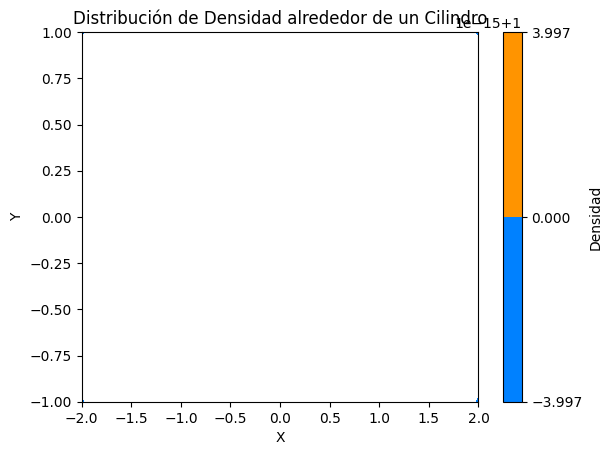

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
gamma = 1.4  # Ratio de calores específicos
R = 1.0  # Radio del cilindro
rho_inf = 1.0  # Densidad en el infinito
u_inf = 1.0  # Velocidad en el infinito
p_inf = 1.0  # Presión en el infinito
nx = 200  # Número de puntos en la dirección x
ny = 100  # Número de puntos en la dirección y
Lx = 4.0  # Longitud del dominio en x
Ly = 2.0  # Longitud del dominio en y
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)
dt = 0.001  # Paso de tiempo inicial
n_steps = 1000  # Número de pasos de tiempo

# Definición de las mallas
x = np.linspace(-Lx / 2, Lx / 2, nx)
y = np.linspace(-Ly / 2, Ly / 2, ny)
X, Y = np.meshgrid(x, y)

# Inicialización de las variables
rho = np.ones((ny, nx)) * rho_inf
u = np.ones((ny, nx)) * u_inf
v = np.zeros((ny, nx))
p = np.ones((ny, nx)) * p_inf

# Condiciones iniciales
for i in range(ny):
    for j in range(nx):
        if np.sqrt(X[i, j]**2 + Y[i, j]**2) < R:
            rho[i, j] = 10.0
            u[i, j] = 0.0
            v[i, j] = 0.0
            p[i, j] = 10.0

# Funciones auxiliares
def compute_flux(rho, u, v, p):
    e = p / (gamma - 1) + 0.5 * rho * (u**2 + v**2)
    F1 = rho * u
    F2 = rho * u**2 + p
    F3 = rho * u * v
    F4 = u * (e + p)
    G1 = rho * v
    G2 = rho * u * v
    G3 = rho * v**2 + p
    G4 = v * (e + p)
    return F1, F2, F3, F4, G1, G2, G3, G4

def compute_time_step(rho, u, v, p):
    a = np.sqrt(gamma * p / rho)
    return 0.5 * min(dx / (np.abs(u) + a).max(), dy / (np.abs(v) + a).max())

# Solución mediante el esquema de MacCormack
for step in range(n_steps):
    # Predicción
    F1, F2, F3, F4, G1, G2, G3, G4 = compute_flux(rho, u, v, p)
    
    rho_pred = np.zeros_like(rho)
    u_pred = np.zeros_like(u)
    v_pred = np.zeros_like(v)
    p_pred = np.zeros_like(p)
    
    rho_pred[1:-1, 1:-1] = rho[1:-1, 1:-1] - dt * ((F1[1:-1, 2:] - F1[1:-1, :-2]) / (2 * dx) + (G1[2:, 1:-1] - G1[:-2, 1:-1]) / (2 * dy))
    u_pred[1:-1, 1:-1] = (rho[1:-1, 1:-1] * u[1:-1, 1:-1] - dt * ((F2[1:-1, 2:] - F2[1:-1, :-2]) / (2 * dx) + (G2[2:, 1:-1] - G2[:-2, 1:-1]) / (2 * dy))) / rho_pred[1:-1, 1:-1]
    v_pred[1:-1, 1:-1] = (rho[1:-1, 1:-1] * v[1:-1, 1:-1] - dt * ((F3[1:-1, 2:] - F3[1:-1, :-2]) / (2 * dx) + (G3[2:, 1:-1] - G3[:-2, 1:-1]) / (2 * dy))) / rho_pred[1:-1, 1:-1]
    p_pred[1:-1, 1:-1] = (rho[1:-1, 1:-1] * (p[1:-1, 1:-1] / (gamma - 1) + 0.5 * (u[1:-1, 1:-1]**2 + v[1:-1, 1:-1])) - dt * ((F4[1:-1, 2:] - F4[1:-1, :-2]) / (2 * dx) + (G4[2:, 1:-1] - G4[:-2, 1:-1]) / (2 * dy))) / rho_pred[1:-1, 1:-1]
    
    # Corrección
    F1, F2, F3, F4, G1, G2, G3, G4 = compute_flux(rho_pred, u_pred, v_pred, p_pred)
    
    rho[1:-1, 1:-1] = 0.5 * (rho[1:-1, 1:-1] + rho_pred[1:-1, 1:-1] - dt * ((F1[1:-1, 2:] - F1[1:-1, :-2]) / (2 * dx) + (G1[2:, 1:-1] - G1[:-2, 1:-1]) / (2 * dy)))
    u[1:-1, 1:-1] = 0.5 * (u[1:-1, 1:-1] + (rho_pred[1:-1, 1:-1] * u_pred[1:-1, 1:-1] - dt * ((F2[1:-1, 2:] - F2[1:-1, :-2]) / (2 * dx) + (G2[2:, 1:-1] - G2[:-2, 1:-1]) / (2 * dy))) / rho[1:-1, 1:-1])
    v[1:-1, 1:-1] = 0.5 * (v[1:-1, 1:-1] + (rho_pred[1:-1, 1:-1] * v_pred[1:-1, 1:-1] - dt * ((F3[1:-1, 2:] - F3[1:-1, :-2]) / (2 * dx) + (G3[2:, 1:-1] - G3[:-2, 1:-1]) / (2 * dy))) / rho[1:-1, 1:-1])
    p[1:-1, 1:-1] = 0.5 * (p[1:-1, 1:-1] + (rho_pred[1:-1, 1:-1] * (p_pred[1:-1, 1:-1] / (gamma - 1) + 0.5 * (u_pred[1:-1, 1:-1]**2 + v_pred[1:-1, 1:-1])) - dt * ((F4[1:-1, 2:] - F4[1:-1, :-2]) / (2 * dx) + (G4[2:, 1:-1] - G4[:-2, 1:-1]) / (2 * dy))) / rho[1:-1, 1:-1])
    
    # Actualización del paso de tiempo
    dt = compute_time_step(rho, u, v, p)
    
    # Imprimir estado actual
    if step % 100 == 0:
        print(f"Step: {step}, dt: {dt}")

# Visualización
plt.contourf(X, Y, rho, levels=50, cmap='jet')
plt.colorbar(label='Densidad')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distribución de Densidad alrededor de un Cilindro')
plt.show()
